In [79]:
import pandas as pd
credit_df = pd.read_csv("credit_data.csv")
credit_df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,NaN
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


In [80]:
credit_df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [81]:
credit_df.dtypes

Age                           int64
Gender                       object
Income                        int64
Credit Score                  int64
Credit History Length         int64
Number of Existing Loans      int64
Loan Amount                   int64
Loan Tenure                   int64
Existing Customer            object
State                        object
City                         object
LTV Ratio                   float64
Employment Profile           object
Profile Score                 int64
Occupation                   object
dtype: object

In [96]:
credit_num = credit_df.select_dtypes(include=["int64", "float64"])
credit_cat = credit_df.select_dtypes(include=["object"]).join(credit_df["Profile Score"])

In [97]:
credit_num

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
0,31,36000,604,487,5,109373,221,90.943430,77
1,25,50000,447,386,2,150000,89,91.135253,43
2,62,178000,850,503,10,69099,110,40.000000,90
3,69,46000,668,349,6,150000,148,87.393365,86
4,52,132000,601,553,5,150000,157,66.158757,90
...,...,...,...,...,...,...,...,...,...
279851,69,61000,495,565,3,150000,14,90.300189,71
279852,45,124000,850,476,10,80341,86,78.960607,91
279853,33,71000,582,560,5,39851,101,95.000000,57
279854,67,191000,411,481,2,150000,111,56.109002,69


In [88]:
list(credit_num.columns)

['Age',
 'Income',
 'Credit Score',
 'Credit History Length',
 'Number of Existing Loans',
 'Loan Amount',
 'Loan Tenure',
 'LTV Ratio',
 'Profile Score']

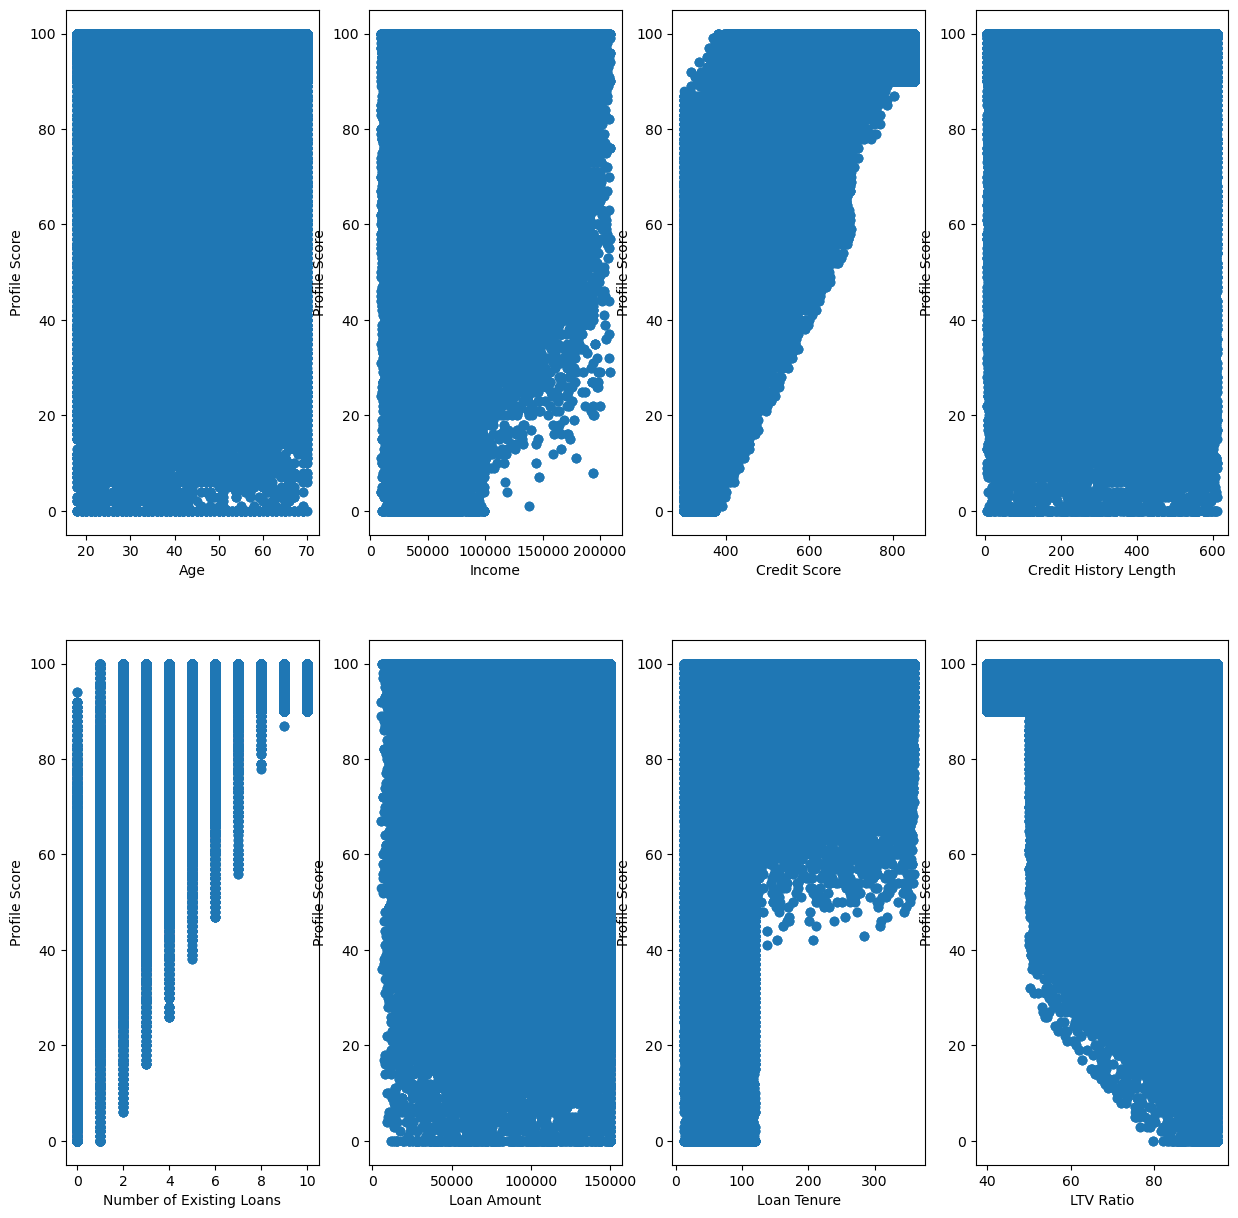

In [89]:
import matplotlib.pyplot as plt
num_fig, num_axs = plt.subplots(2, 4, figsize=(15, 15))
for i in range(2):
    for j in range(4):
        column = list(credit_num.columns)[j + (i * 4)]
        num_axs[i, j].scatter(credit_num[column], credit_num["Profile Score"])
        num_axs[i, j].set_xlabel(column)
        num_axs[i, j].set_ylabel("Profile Score")

In [116]:
credit_num[credit_num["Number of Existing Loans"] == 10]

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
2,62,178000,850,503,10,69099,110,40.000000,90
5,64,127000,850,158,10,108702,111,82.331250,92
11,64,167000,850,439,10,150000,102,41.928687,100
31,57,130000,850,600,10,56891,195,40.481983,96
35,67,134000,850,219,10,150000,341,74.226829,90
...,...,...,...,...,...,...,...,...,...
279789,40,111000,850,336,10,109911,332,80.742773,98
279817,59,112000,850,237,10,134143,313,80.819232,98
279823,38,110000,850,68,10,140288,210,84.394204,96
279843,41,91000,850,357,10,150000,275,58.482919,96


In [98]:
credit_cat

,Gender,Existing Customer,State,City,Employment Profile,Occupation,Profile Score
0,Male,No,Karnataka,Mysuru,Salaried,Doctor,77
1,Male,No,Karnataka,Bengaluru,Salaried,Software Engineer,43
2,Other,Yes,Uttar Pradesh,Kanpur,Salaried,Banker,90
3,Female,Yes,Karnataka,Bengaluru,Self-Employed,Contractor,86
4,Male,No,Karnataka,Mysuru,Salaried,Teacher,90
...,...,...,...,...,...,...,...
279851,Male,No,Tamil Nadu,Chennai,Salaried,Software Engineer,71
279852,Female,Yes,Karnataka,Bengaluru,Salaried,Civil Servant,91
279853,Female,No,Karnataka,Mysuru,Unemployed,NaN,57
279854,Male,No,Delhi,New Delhi,Salaried,Software Engineer,69


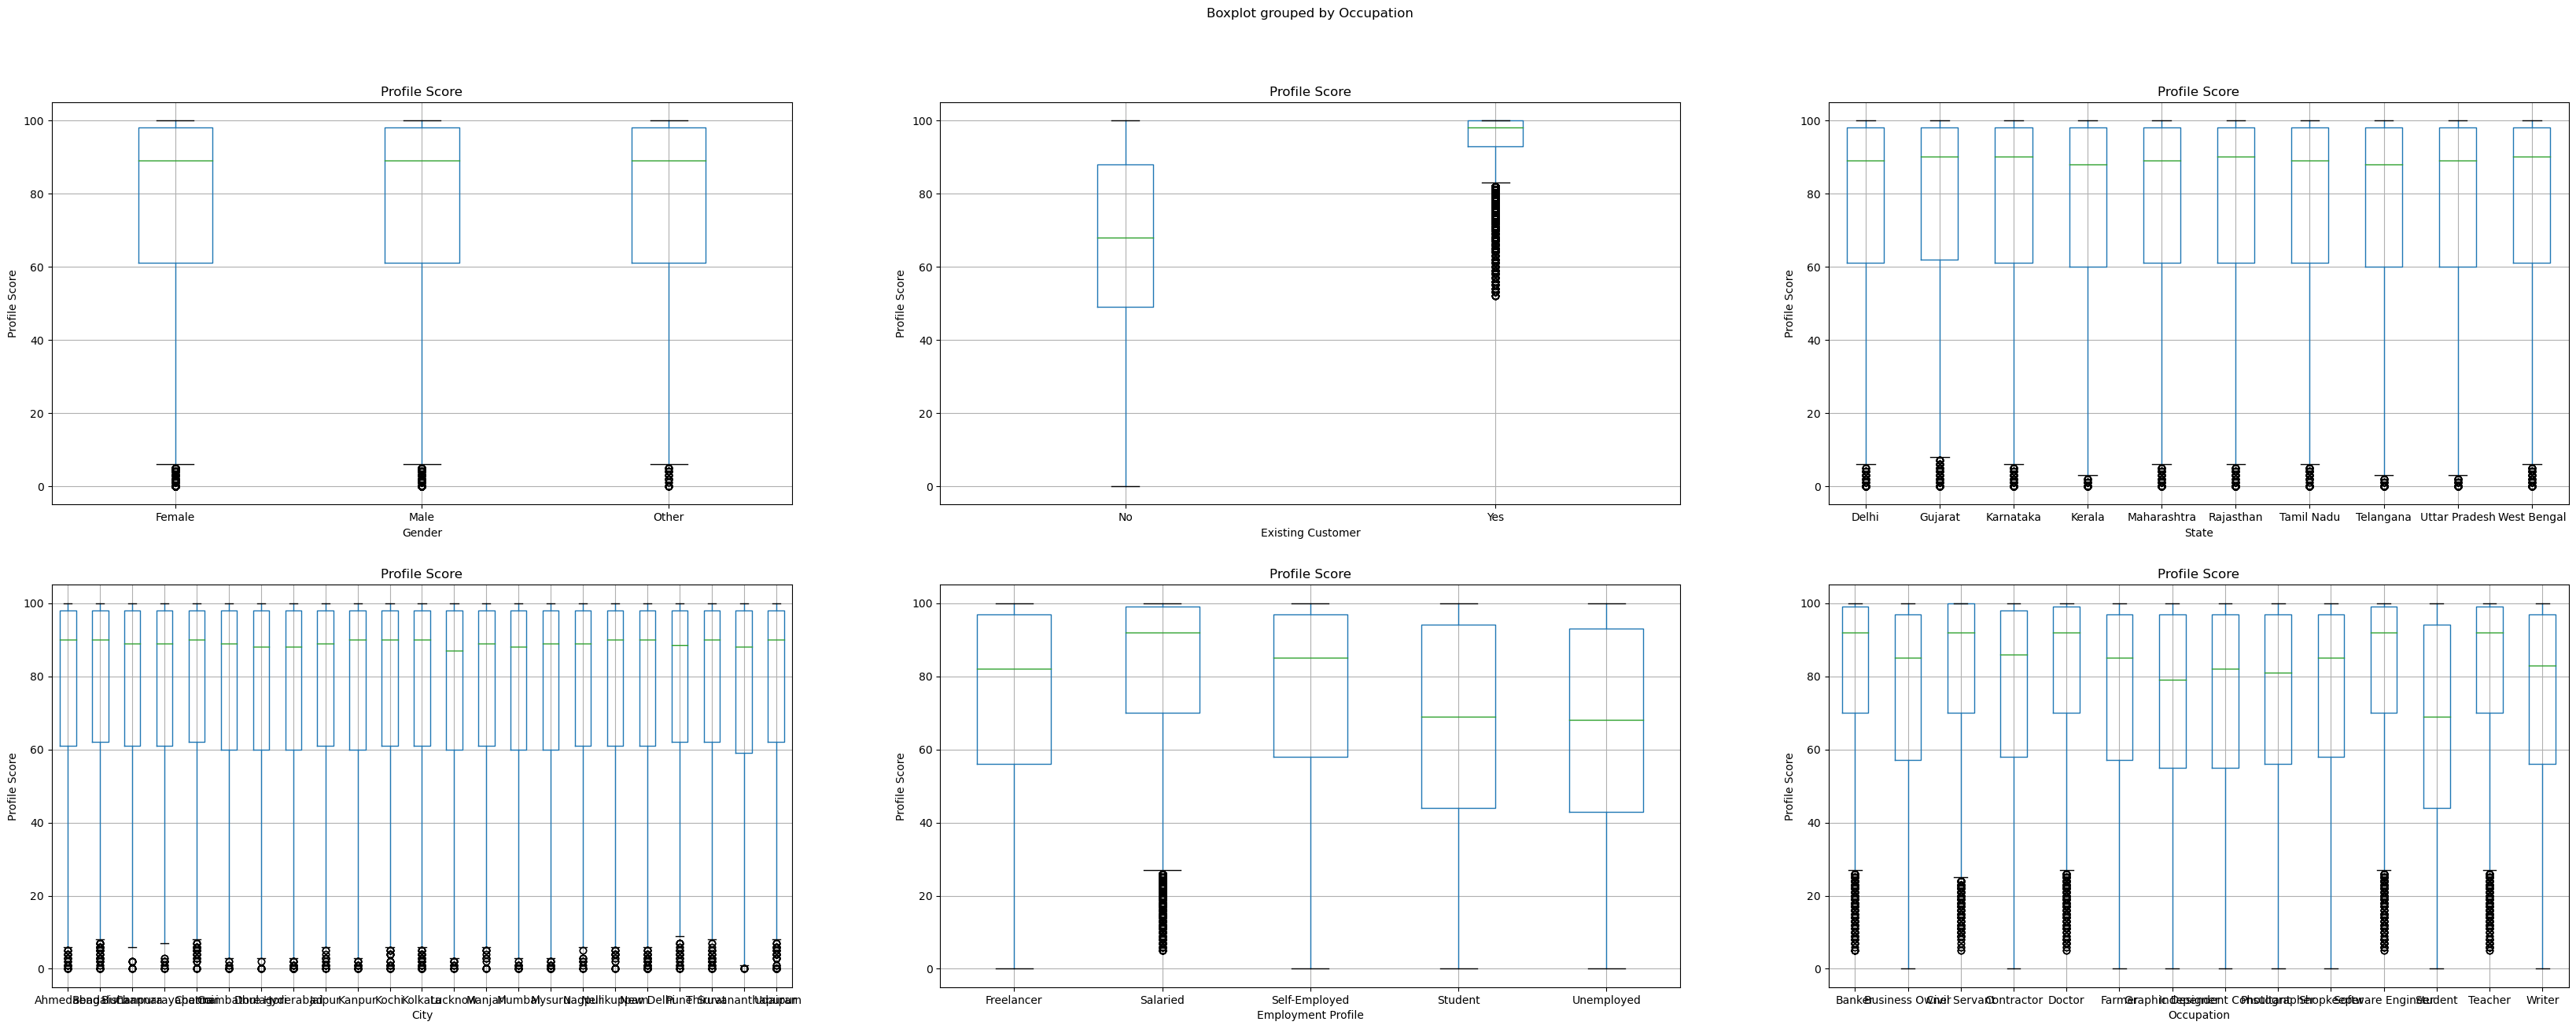

In [115]:
import matplotlib.pyplot as plt
cat_fig, cat_axs = plt.subplots(2, 3, figsize=(40, 15))
for i in range(2):
    for j in range(3):
        col = list(credit_cat.columns)[j + (i * 3)]
        credit_cat.boxplot(column = "Profile Score", by = col, ax = cat_axs[i, j])
        cat_axs[i, j].set_xlabel(col)
        cat_axs[i, j].set_ylabel("Profile Score")

In [122]:
select_df = credit_df[["Age", "Income", "Credit Score", "Number of Existing Loans", "Loan Tenure", "LTV Ratio",
                     "Existing Customer", "Employment Profile", "Occupation", "Profile Score"]]
select_df

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,LTV Ratio,Existing Customer,Employment Profile,Occupation,Profile Score
0,31,36000,604,5,221,90.943430,No,Salaried,Doctor,77
1,25,50000,447,2,89,91.135253,No,Salaried,Software Engineer,43
2,62,178000,850,10,110,40.000000,Yes,Salaried,Banker,90
3,69,46000,668,6,148,87.393365,Yes,Self-Employed,Contractor,86
4,52,132000,601,5,157,66.158757,No,Salaried,Teacher,90
...,...,...,...,...,...,...,...,...,...,...
279851,69,61000,495,3,14,90.300189,No,Salaried,Software Engineer,71
279852,45,124000,850,10,86,78.960607,Yes,Salaried,Civil Servant,91
279853,33,71000,582,5,101,95.000000,No,Unemployed,NaN,57
279854,67,191000,411,2,111,56.109002,No,Salaried,Software Engineer,69


In [123]:
select_df.isna().sum()

Age                             0
Income                          0
Credit Score                    0
Number of Existing Loans        0
Loan Tenure                     0
LTV Ratio                       0
Existing Customer               0
Employment Profile              0
Occupation                  18272
Profile Score                   0
dtype: int64

In [127]:
select_df[select_df["Occupation"].isna()]

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,LTV Ratio,Existing Customer,Employment Profile,Occupation,Profile Score
25,61,41000,307,0,99,58.686622,No,Unemployed,NaN,23
28,52,87000,697,7,70,94.616809,Yes,Unemployed,NaN,58
31,57,130000,850,10,195,40.481983,Yes,Unemployed,NaN,96
33,53,33000,428,2,56,53.836170,No,Unemployed,NaN,62
41,18,16000,329,0,119,94.802565,No,Unemployed,NaN,17
...,...,...,...,...,...,...,...,...,...,...
279777,24,67000,374,1,81,52.352218,No,Unemployed,NaN,52
279792,24,51000,514,3,69,54.303719,No,Unemployed,NaN,80
279806,39,22000,683,6,261,93.614738,Yes,Unemployed,NaN,84
279825,70,41000,626,5,300,53.113861,No,Unemployed,NaN,99


In [128]:
select_df[select_df["Employment Profile"] == "Unemployed"]

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,LTV Ratio,Existing Customer,Employment Profile,Occupation,Profile Score
25,61,41000,307,0,99,58.686622,No,Unemployed,NaN,23
28,52,87000,697,7,70,94.616809,Yes,Unemployed,NaN,58
31,57,130000,850,10,195,40.481983,Yes,Unemployed,NaN,96
33,53,33000,428,2,56,53.836170,No,Unemployed,NaN,62
41,18,16000,329,0,119,94.802565,No,Unemployed,NaN,17
...,...,...,...,...,...,...,...,...,...,...
279777,24,67000,374,1,81,52.352218,No,Unemployed,NaN,52
279792,24,51000,514,3,69,54.303719,No,Unemployed,NaN,80
279806,39,22000,683,6,261,93.614738,Yes,Unemployed,NaN,84
279825,70,41000,626,5,300,53.113861,No,Unemployed,NaN,99


In [135]:
select_df = select_df.fillna("Unemployed")
select_df

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,LTV Ratio,Existing Customer,Employment Profile,Occupation,Profile Score
0,31,36000,604,5,221,90.943430,No,Salaried,Doctor,77
1,25,50000,447,2,89,91.135253,No,Salaried,Software Engineer,43
2,62,178000,850,10,110,40.000000,Yes,Salaried,Banker,90
3,69,46000,668,6,148,87.393365,Yes,Self-Employed,Contractor,86
4,52,132000,601,5,157,66.158757,No,Salaried,Teacher,90
...,...,...,...,...,...,...,...,...,...,...
279851,69,61000,495,3,14,90.300189,No,Salaried,Software Engineer,71
279852,45,124000,850,10,86,78.960607,Yes,Salaried,Civil Servant,91
279853,33,71000,582,5,101,95.000000,No,Unemployed,Unemployed,57
279854,67,191000,411,2,111,56.109002,No,Salaried,Software Engineer,69


In [145]:
def onehot(df, feature):
    dummies = pd.get_dummies(df[[feature]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature], axis=1)
    return(res) 

In [146]:
for column in ["Existing Customer", "Employment Profile", "Occupation"]:
    select_df = onehot(select_df, column)
select_df

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,LTV Ratio,Profile Score,Existing Customer_No,Existing Customer_Yes,Employment Profile_Freelancer,...,Occupation_Farmer,Occupation_Graphic Designer,Occupation_Independent Consultant,Occupation_Photographer,Occupation_Shopkeeper,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer
0,31,36000,604,5,221,90.943430,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,50000,447,2,89,91.135253,43,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,62,178000,850,10,110,40.000000,90,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,69,46000,668,6,148,87.393365,86,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,52,132000,601,5,157,66.158757,90,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,61000,495,3,14,90.300189,71,1,0,0,...,0,0,0,0,0,1,0,0,0,0
279852,45,124000,850,10,86,78.960607,91,0,1,0,...,0,0,0,0,0,0,0,0,0,0
279853,33,71000,582,5,101,95.000000,57,1,0,0,...,0,0,0,0,0,0,0,0,1,0
279854,67,191000,411,2,111,56.109002,69,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [147]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(select_df, test_size=0.2)

In [148]:
train_y = train_x.pop("Profile Score")
test_y = test_x.pop("Profile Score")

In [149]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [151]:
pred = model.predict(test_x)

In [163]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred, squared = False)

3.2643949769987017

In [165]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y, pred)

12873864438992.355

In [166]:
select_df[select_df["Profile Score"] == 0]

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,LTV Ratio,Profile Score,Existing Customer_No,Existing Customer_Yes,Employment Profile_Freelancer,...,Occupation_Farmer,Occupation_Graphic Designer,Occupation_Independent Consultant,Occupation_Photographer,Occupation_Shopkeeper,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer
116,69,51000,311,0,43,95.000000,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
127,28,28000,300,0,64,95.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
548,59,29000,373,1,104,95.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
739,39,42000,300,0,71,90.946626,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
770,40,99000,321,0,111,90.227652,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278761,34,27000,303,0,72,93.536224,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
278839,46,91000,338,0,63,95.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
278914,56,31000,300,0,67,95.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
278976,24,22000,300,0,63,95.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
